モジュールのインポート  

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

色々初期に設定

In [2]:
sift = cv2.xfeatures2d.SIFT_create()
class_size = 4
cls = KMeans(n_clusters=class_size)

quest_arr = []
ORG_arr = []
Mypage_arr = []
battle_arr= []

クエスト画像の特徴点記述し１つにまとめる

In [3]:
for i in range(15):
    quest = cv2.imread("quest_"+str(i)+".jpg")
    Gquest = cv2.imread("quest_"+str(i)+".jpg", 0)

    quest_kp, quest_desc = sift.detectAndCompute(Gquest, None)
    quest_descriptors = quest_desc.astype(np.float32)

    quest_arr.extend(quest_descriptors)

編成画像の特徴点記述し１つにまとめる

In [4]:
for i in range(30):
    ORG = cv2.imread("ORG_"+str(i)+".jpg")
    GORG = cv2.imread("ORG_"+str(i)+".jpg", 0)

    ORG_kp, ORG_desc = sift.detectAndCompute(GORG, None)
    ORG_descriptors = ORG_desc.astype(np.float32)

    ORG_arr.extend(ORG_descriptors)

マイページ画像の特徴点記述し１つにまとめる

In [5]:
for i in range(15):
    Mypage = cv2.imread("Mypage_"+str(i)+".jpg")
    GMypage = cv2.imread("Mypage_"+str(i)+".jpg", 0)

    Mypage_kp, Mypage_desc = sift.detectAndCompute(GMypage, None)
    Mypage_descriptors = Mypage_desc.astype(np.float32)

    Mypage_arr.extend(Mypage_descriptors)

バトル画像の特徴点記述し１つにまとめる

In [6]:
for i in range(12):
    battle = cv2.imread("battle_"+str(i)+".jpg")
    Gbattle = cv2.imread("battle_"+str(i)+".jpg", 0)

    battle_kp, battle_desc = sift.detectAndCompute(Gbattle, None)
    battle_descriptors = battle_desc.astype(np.float32)

    battle_arr.extend(battle_descriptors)

In [7]:
print('quest',len(quest_arr))
print('ORG',len(ORG_arr))
print('Mypage',len(Mypage_arr))
print('battle',len(battle_arr))

quest 129979
ORG 320602
Mypage 158008
battle 136436


全部まとめる

In [8]:
all_arr = []

In [9]:
all_arr.extend(quest_arr)
all_arr.extend(ORG_arr)
all_arr.extend(Mypage_arr)
all_arr.extend(battle_arr)

len(all_arr)

745025

In [10]:
cls.fit(all_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
quest_test = cv2.imread('quest_2.jpg', 0)
q_kp, q_dc = sift.detectAndCompute(quest_test, None)
q_descriptors = q_dc.astype(np.float32)

In [12]:
ORG_test = cv2.imread('ORG_10.jpg', 0)
ORG_kp, ORG_dc = sift.detectAndCompute(ORG_test, None)
ORG_descriptors = ORG_dc.astype(np.float32)

In [13]:
M_test = cv2.imread('Mypage_3.jpg', 0)
M_kp, M_dc = sift.detectAndCompute(M_test, None)
M_descriptors = M_dc.astype(np.float32)

In [14]:
B_test = cv2.imread('battle_1.jpg', 0)
B_kp, B_dc = sift.detectAndCompute(B_test, None)
B_descriptors = B_dc.astype(np.float32)

(array([1400.,    0.,    0., 2365.,    0.,    0., 3139.,    0.,    0.,
        1877.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

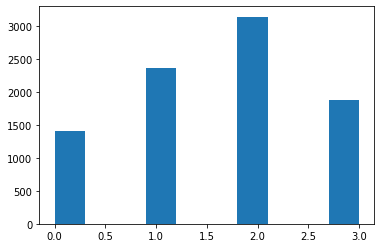

In [15]:
quest_label = cls.predict(q_dc)
plt.hist(quest_label)

(array([2138.,    0.,    0., 2586.,    0.,    0., 3826.,    0.,    0.,
        2421.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

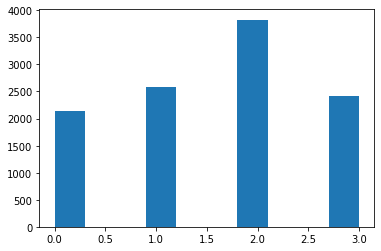

In [16]:
ORG_label = cls.predict(ORG_dc)
plt.hist(ORG_label)

(array([1802.,    0.,    0., 2939.,    0.,    0., 3991.,    0.,    0.,
        2504.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

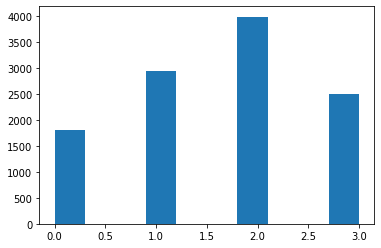

In [17]:
Mypage_label = cls.predict(M_dc)
plt.hist(Mypage_label)

(array([1862.,    0.,    0., 2700.,    0.,    0., 3800.,    0.,    0.,
        1566.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

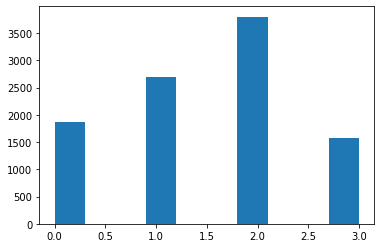

In [18]:
battle_label = cls.predict(B_dc)
plt.hist(battle_label)